In [28]:
#import du dataset et des bibliotheques 
from keras.datasets import reuters
import numpy as np
import matplotlib.pylab as plt

In [29]:
#recupération des données
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)
print(train_data.shape,train_labels.shape)

(8982,) (8982,)


In [30]:
#on affiche le contenue d'un  papiers presse et sa classe 
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '-') for i in
train_data[0]])
print(decoded_newswire)
print(train_labels[0])

- - - said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [31]:
# on crée fonction d'encodage (encodage one hot)
def encodeur(data,dimension):
    #on creer un tenseur remplir de zero de la taille de  (len(data),dimension)
    results=np.zeros((len(data),dimension))
    # on remplace la valeurs 0 situé à l'indice de la valeurs contenue dans data par 1  
    for i , data in enumerate(data):
        results[i,data]=1
    return(results)
    #on applique la transformation a nos données
x_train=encodeur(train_data,10000)
x_test=encodeur(test_data,10000)
#dimension=46 car on a 46 classe 
y_train=encodeur(train_labels,46)
y_test=encodeur(test_labels,46)

In [32]:
from keras import Sequential
from keras import models
from keras import layers
#on creer le model
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
#on divise nos données d'entrainement en 02 parties une pour l'entrainement et une autre pour la validation
x_val=x_train[:1000]
x_parial_train=x_train[1000:]
y_val=y_train[:1000]
y_partial_train=y_train[1000:]
#on entraine le model
history=model.fit(x_parial_train,y_partial_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 0s 23ms/step - loss: 0.2416 - accuracy: 0.9440 - val_loss: 0.9296 - val_accuracy: 0.8100
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 0.2066 - accuracy: 0.9503 - val_loss: 0.9107 - val_accuracy: 0.8200
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 0.1865 - accuracy: 0.9496 - val_loss: 0.9682 - val_accuracy: 0.8100
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.1678 - accuracy: 0.9529 - val_loss: 0.9592 - val_accuracy: 0.8110
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.1591 - accuracy: 0.9538 - val_loss: 0.9961 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.1380 - accuracy: 0.9551 - val_loss: 1.0506 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 0s 20ms/step - loss: 0.1344 - accuracy: 0.9572 - val_loss: 1.0087 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

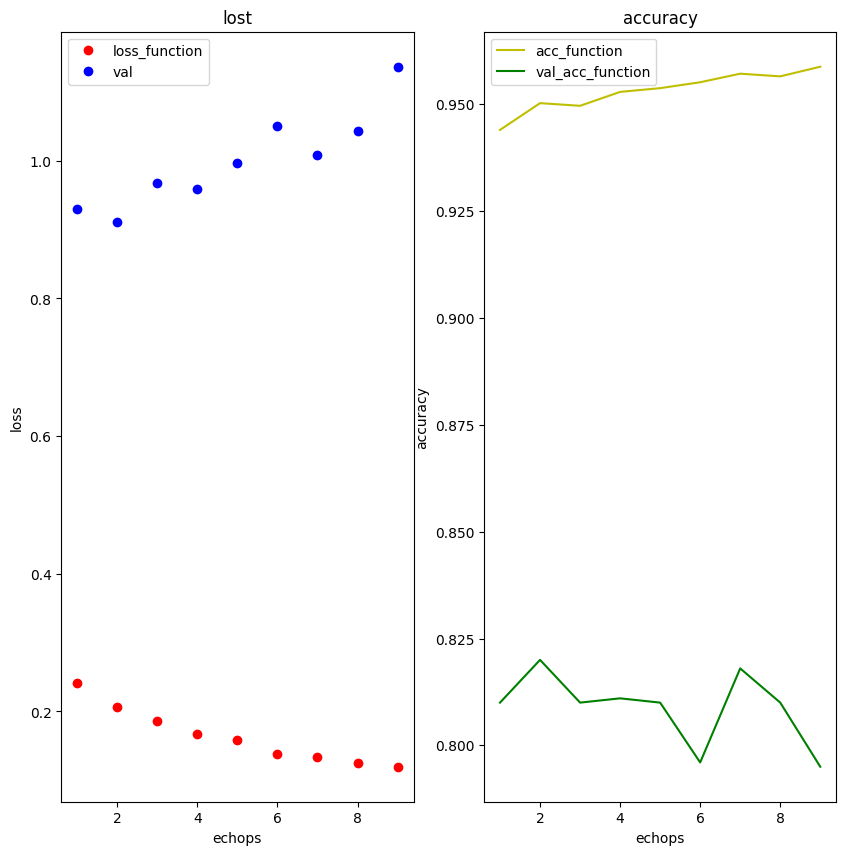

In [36]:
#on trace la courbe de la fonction perte sur les données d'entrainement et de validation
loss=history.history['loss']
val_loss=history.history['val_loss']
echops=np.arange(1,1+len(loss))
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(echops,loss,'ro',label='loss_function')
plt.plot(echops,val_loss,'bo',label='val')
plt.xlabel('echops')
plt.ylabel('loss')
plt.title('lost')
plt.legend()
#on trace la courbe de precision sur les données d'entrainement et de validation
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
echops2=np.arange(1,1+len(acc))
plt.subplot(1,2,2)
plt.plot(echops2,acc,'y',label='acc_function')
plt.plot(echops2,val_acc,'g',label='val_acc_function')
plt.xlabel('echops')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

In [37]:
#on evalue le model sur les données de test
results=model.evaluate(x_test,y_test)


71/71 [==============================] - 0s 2ms/step - loss: 1.2412 - accuracy: 0.7792
